<a href="https://colab.research.google.com/github/DamodaraBarbosa/xbox_game_pass_analisys/blob/main/Statistical_Analisys_Xbox_Game_Pass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando as bibliotecas

In [142]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from numpy import NaN

Parâmetros do matplotlib

In [143]:
plt.rcParams['figure.figsize'] = (18, 12)
parametros = {'axes.labelsize': 25, 'axes.titlesize': 30}
plt.rcParams.update(parametros)

Importando o dataframe

In [144]:
gamepass = pd.read_csv('/content/data_gamepass.csv')
gamepass.head()

,game,system,status,release_date,added,removed,genre,developer,publisher,esrb,...,addons,ta_score,gamerscore,ratio,gamers,comp_%,comp_time,rating,metascore,userscore
0,PERSONA 3 PORTABLE,Xbox / PC,Coming Soon,NaN,2023-01-01,NaN,Role-Playing,Atlus,Sega,M,...,[''],NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,PERSONA 4 GOLDEN,Xbox / PC,Coming Soon,NaN,2023-01-01,NaN,NaN,Atlus,Sega,M,...,[''],NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,HIGH ON LIFE,Xbox / PC,Coming Soon,NaN,2022-12-01,NaN,First-Person Shooter,NaN,NaN,M,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,HELLO NEIGHBOR 2,Xbox / PC,Coming Soon,NaN,2022-12-01,NaN,Strategy / Puzzle,Dynamic Pixels,TinyBuild,E10+,...,[''],NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,WARHAMMER 40000 DARKTIDE,Xbox / PC,Coming Soon,NaN,2022-11-01,NaN,Action,Fatshark,Fatshark,RP,...,['Optimized for Xbox Series X/S'],NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [145]:
gamepass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   game          1197 non-null   object 
 1   system        1196 non-null   object 
 2   status        1196 non-null   object 
 3   release_date  753 non-null    object 
 4   added         1197 non-null   object 
 5   removed       646 non-null    object 
 6   genre         1192 non-null   object 
 7   developer     733 non-null    object 
 8   publisher     733 non-null    object 
 9   esrb          678 non-null    object 
 10  esrb content  594 non-null    object 
 11  addons        733 non-null    object 
 12  ta_score      906 non-null    float64
 13  gamerscore    906 non-null    float64
 14  ratio         905 non-null    float64
 15  gamers        926 non-null    float64
 16  comp_%        926 non-null    float64
 17  comp_time     846 non-null    float64
 18  rating        864 non-null  

In [146]:
gamepass.at[412, 'developer'] = ['Rare', 'Dlala Studios']

In [147]:
gamepass.at[429, 'developer'] = ['The Coalition', 'Splash Damage']

# Análise estatística dos dados

## Das variáveis qualitativas

### Frequência das developers

Tratamentos da variável developer

In [148]:
for index, developers in enumerate(gamepass['developer']):
  try:
    if '343' in developers:
      print(f'{index}: {developers}')
  except TypeError:
    pass

# os dados dos index 499, 522 e 539 foram inseridos com fragia errada

194: 343 Industries
330: 343 Industries
499: 343 IndustriesBungie
522: Behaviour Interactive343i
538: 343 Industries
539: 343 IndustriesVanguard Games


In [149]:
# os dados são corrigidos manualmente:

gamepass.at[499, 'developer'] = ['343 Industries', 'Bungie']
gamepass.at[522, 'developer'] = ['343 Industries', 'Behaviour Interactive']
gamepass.at[539, 'developer'] = ['343 Industries', 'Vanguard Games']

In [150]:
# tratamento para uso do método split()

gamepass['developer'].replace(' , ', ', ', inplace= True)
gamepass['developer'] = gamepass['developer'].str.replace(' / ', '/')

In [151]:
# itera-se da coluna developer e se separam os dados que são separados por ', ' ou '/'

for index, developers in enumerate(gamepass['developer']):
  try:
    if ',' in developers and 'Inc.' not in developers and 'JW' not in developers:
      developers = developers.split(', ')
      gamepass.at[index, 'developer'] = developers
    if '/' in developers:
      developers = developers.split('/')
      gamepass.at[index, 'developer'] = developers
  except:
    pass

In [152]:
# como há jogos que não são desenvolvidos por apenas uma desenvolvedora, mas em colaboração, é preferível não usar
# o método value_counts(), mas iterar os valores da coluna para acessar os elementos das listas, quando forem listas.

Para os jogos inseridos no serviço


In [153]:
# a função garante a obtenção da frequência de cada developer, gênero de jogo ou publisher:

def freq_column(column, query= None):
  datas_dict = dict()

  for datas in gamepass[column]:
    if type(datas) == list:
      for data in datas:
        if data not in datas_dict.keys():
          datas_dict[data] = 1
        else:
          datas_dict[data] = datas_dict[data] + 1
    else:
      if datas not in datas_dict.keys():
        datas_dict[datas] = 1
      else:
        datas_dict[datas] += 1
      
  return datas_dict

In [154]:
developers_dict = freq_column('developer')

In [155]:
developers_dict.pop(NaN)

469

In [156]:
# para ordenar o dicionário:

developers_sorted = {k: v for k, v in sorted(developers_dict.items(), key=lambda item: item[1], reverse= True)}

In [157]:
# convertendo as keys e os values para o tipo lista a fim de acessá-los pelo index:

developers_sorted_keys = list(developers_sorted)
developers_sorted_values = list(developers_sorted.values())

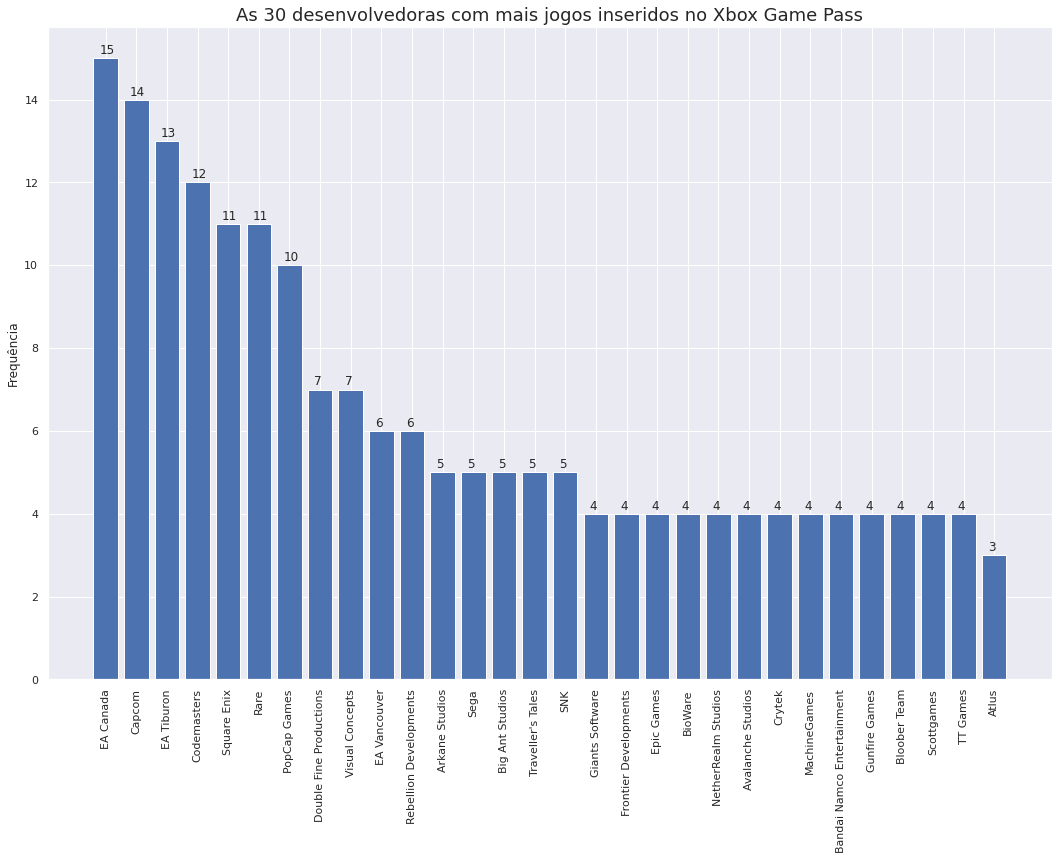

In [158]:
# definindo gráfico com as frequências de cada developer:

sns.set()
bars = plt.bar(developers_sorted_keys[:30], developers_sorted_values[:30])

for bar in bars:
  value = bar.get_height()
  plt.text(bar.get_x() + 0.2, value + 0.1, value)

plt.title('As 30 desenvolvedoras com mais jogos inseridos no Xbox Game Pass', fontsize= 18)
plt.ylabel('Frequência')
plt.xticks(rotation= '90')
plt.show()

## Frequências dos gêneros dos jogos

In [159]:
# alguns tratamentos nos dados da coluna genre,
# particiona-se os dados usando o método split():

gamepass['genre'] = gamepass['genre'].str.replace(' / ', '/')

In [160]:
# para separar os dados dos gêneros dos jogos:

gamepass['genre'] = gamepass['genre'].str.split('/')

In [161]:
# utiliza-se a função freq_column() para obtenção da frequência de cada gênero dos jogos:

genre_dict = freq_column('genre')

In [162]:
# elimina-se as ocorrências em que os jogos não apresentaram gênero:

genre_dict.pop(NaN)

5

In [163]:
# para ordenar o dicionário:

genre_sorted = {k: v for k, v in sorted(genre_dict.items(), key=lambda item: item[1])}

In [164]:
# converte-se as keys e values para o tipo lista a fim de acessá-los pelo index:

genre_sorted_keys = list(genre_sorted.keys())
genre_sorted_values = list(genre_sorted.values())

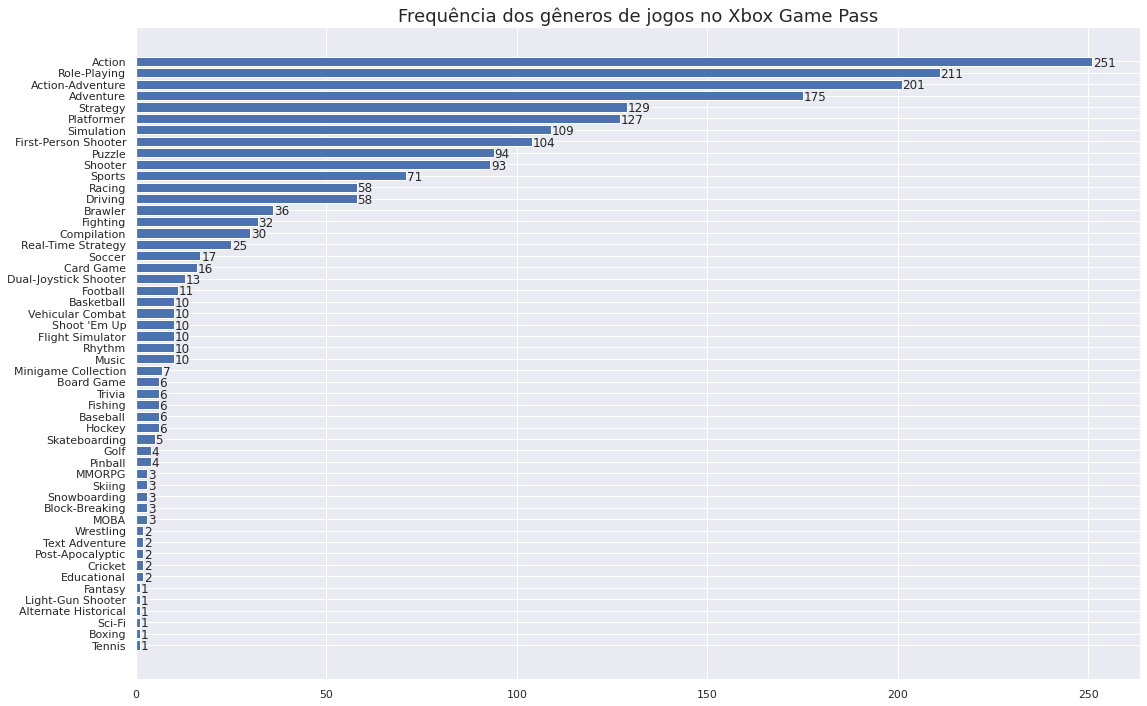

In [165]:
bars = plt.barh(y= genre_sorted_keys, width= genre_sorted_values)

for index, bar in enumerate(bars):
  value = bar.get_width()
  plt.text(value + 0.2, index - 0.4, value)

plt.title('Frequência dos gêneros de jogos no Xbox Game Pass', fontsize= 18)
plt.savefig('Gênero dos jogos no Xbox Game Pass.png', format= 'png')
plt.show()

## Frequência das publishers

In [166]:
# alguns tratamentos para determinar a frequência das publishers:

for index, publishers in enumerate(gamepass['publisher']):
  try:
    if ',' in publishers:
      publishers = publishers.split(', ')
      gamepass.at[index, 'publisher'] = publishers
  except TypeError:
    pass

In [167]:
# as frequências são colocadas em um dicionário:

publishers_dict = freq_column('publisher')

In [168]:
# elimina-se a frequência referente aos jogos que não apresentam publisher:

publishers_dict.pop(NaN)

464

In [169]:
# o dicionário é organizado:

publishers_sorted = {k: v for k, v in sorted(publishers_dict.items(), key=lambda item: item[1], reverse= True)}

In [170]:
# as keys e os valores dos dicionários são convertidos para o tipo lista:

publishers_sorted_keys = list(publishers_sorted.keys())
publishers_sorted_values = list(publishers_sorted.values())

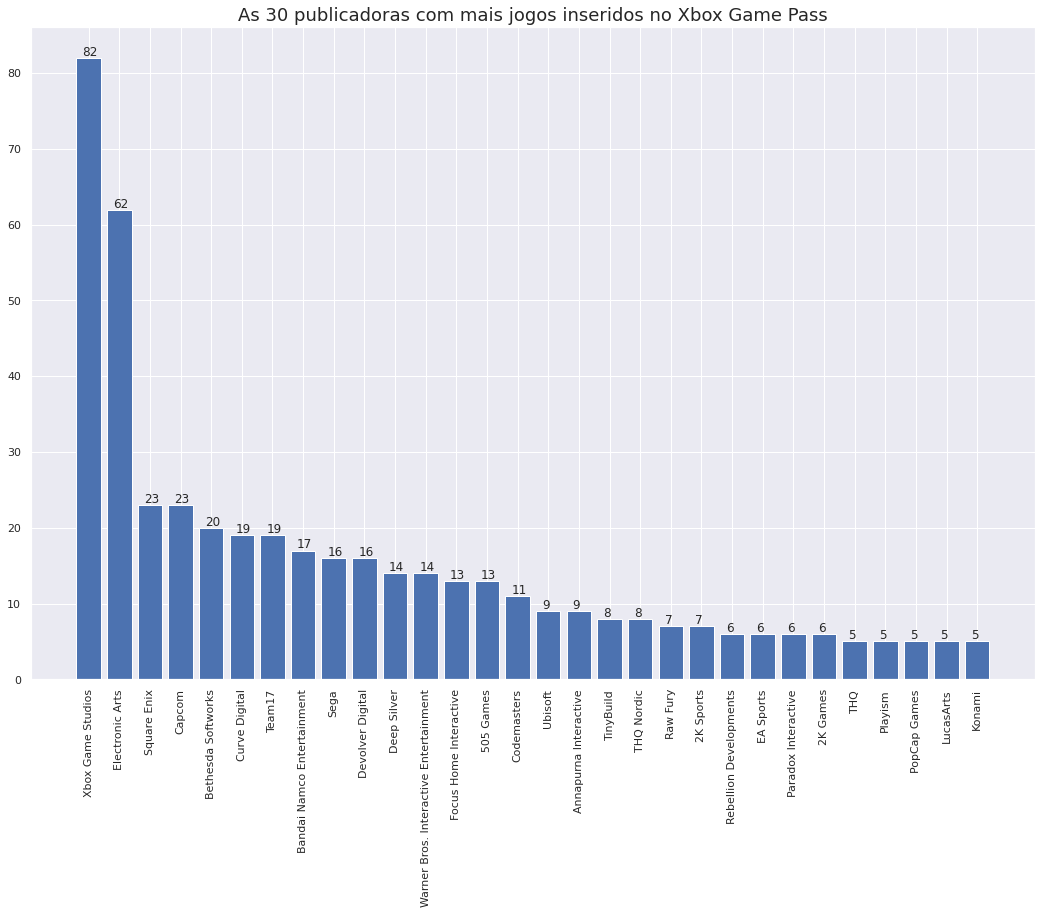

In [171]:
bars = plt.bar(publishers_sorted_keys[:30], publishers_sorted_values[:30])

for bar in bars:
  value = bar.get_height()
  plt.text(bar.get_x() + 0.2, value + 0.3, value)

plt.title('As 30 publicadoras com mais jogos inseridos no Xbox Game Pass', fontsize= 18)
plt.xticks(rotation= '90')
plt.show()

## Das variáveis quantitativas

### Gamers

Para todos os jogos inseridos no serviço

In [172]:
gamepass['gamers'].describe()

count       926.000000
mean      63551.585313
std       75008.761454
min           0.000000
25%       14644.250000
50%       36881.500000
75%       84985.000000
max      468837.000000
Name: gamers, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



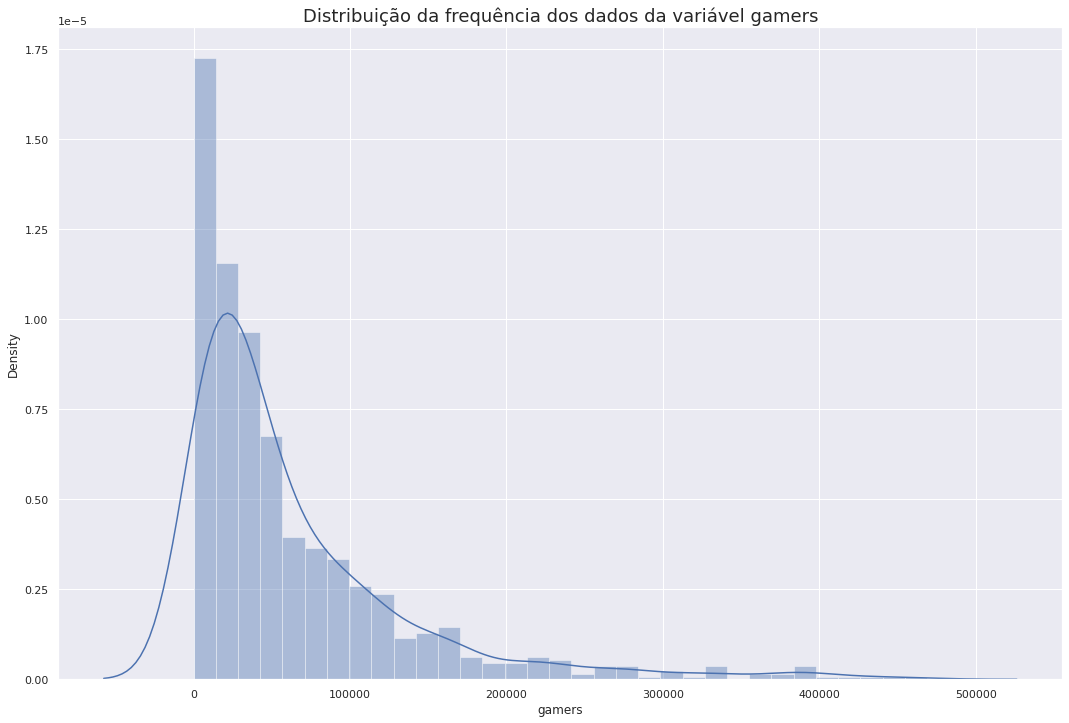

In [173]:
# a distribuição de frequências da coluna 'gamers':

ax = sns.distplot(gamepass['gamers'])
ax.set_title('Distribuição da frequência dos dados da variável gamers', fontsize= 18)
plt.show()

In [174]:
# média, mediana e moda da coluna gamers:

gamers = gamepass['gamers']
pd.DataFrame({'Moda': gamers.mode(), 'Média': gamers.mean(), 'Mediana': gamers.median()})

,Moda,Média,Mediana
0,0.0,63551.585313,36881.5


In [175]:
# desvio médio, variância e desvio padrão:

pd.DataFrame({'Desvio médio': gamers.mad(), 'Variância': gamers.var(), 'Desvio padrão': gamers.std()}, index= [0])

,Desvio médio,Variância,Desvio padrão
0,52414.640713,5.626314e+09,75008.761454


In [176]:
# percentis, decentis, quartis:

# percentis

percentis = pd.DataFrame(gamepass['gamers'].quantile([p/100 for p in range(1, 100)]))
percentis.index = percentis.index * 100
percentis

,gamers
1.0,0.00
2.0,0.00
3.0,296.25
4.0,1367.00
5.0,2111.25
...,...
95.0,218959.00
96.0,238474.00
97.0,274342.75
98.0,322075.50


In [177]:
# decentis

decentis = pd.DataFrame(gamers.quantile([d/10 for d in range(1, 10)]))
decentis.index = decentis.index * 100
decentis

,gamers
10.0,5393.0
20.0,12124.0
30.0,19572.0
40.0,27375.0
50.0,36881.5
60.0,49292.0
70.0,71285.0
80.0,99939.0
90.0,153720.5


In [178]:
# quartis

quartis = pd.DataFrame(gamers.quantile([0.25, 0.5, 0.75]))
quartis.index = quartis.index * 100
quartis

,gamers
25.0,14644.25
50.0,36881.50
75.0,84985.00


In [179]:
# plotando um boxplot:

fig = px.box(gamepass['gamers'], orientation= 'h', title= 'Boxplot da variável gamers inseridos no Xbox Game Pass')
fig.update_layout(title= {'x': 0.5})

Para os jogos ativos no serviço

In [180]:
# instancia-se variável apenas com os jogadores em jogos ativos no serviço:

gamers_active = gamepass.query('status == "Active"')['gamers']

In [181]:
# estatísticas descritivas da variável:

gamers_active.describe()

count       392.000000
mean      82586.073980
std       92750.114665
min           0.000000
25%       18309.500000
50%       48982.500000
75%      112424.000000
max      468837.000000
Name: gamers, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



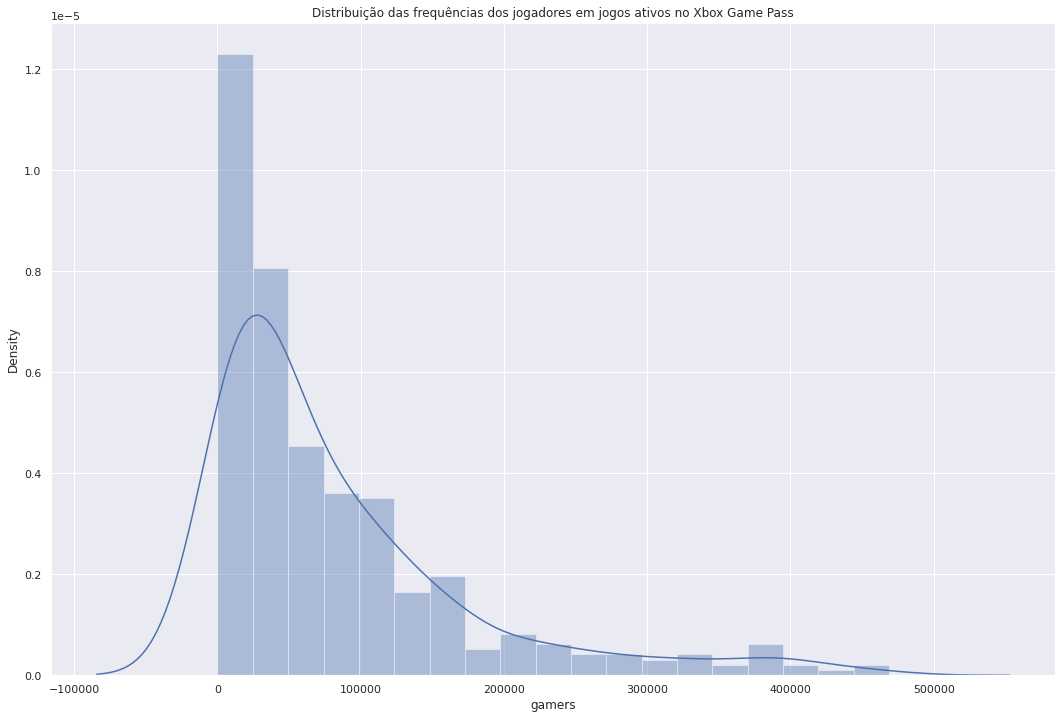

In [182]:
# distribuição das frequências para essa variável:

ax = sns.distplot(gamers_active)
ax.set_title('Distribuição das frequências dos jogadores em jogos ativos no Xbox Game Pass')
ax

In [183]:
# média, mediana e moda para variável:

pd.DataFrame({'Moda': gamers_active.mode(), 'Média': gamers_active.mean(), 'Mediana': gamers_active.median()})

,Moda,Média,Mediana
0,0.0,82586.07398,48982.5


In [184]:
# desvio médio, variância e desvio padrão:

pd.DataFrame({'Desvio médio': gamers_active.mad(), 'Variância': gamers_active.var(), 'Desvio padrão': gamers_active.std()}, index= [0])

,Desvio médio,Variância,Desvio padrão
0,67684.942433,8.602584e+09,92750.114665


In [185]:
# percentis:

pd.DataFrame(gamers_active.quantile([p/100 for p in range (1, 100)]))

,gamers
0.01,0.00
0.02,0.00
0.03,169.06
0.04,1836.52
0.05,2393.30
...,...
0.95,296475.15
0.96,329540.92
0.97,362860.17
0.98,390667.42


In [186]:
# decentis:

pd.DataFrame(gamers_active.quantile([p/10 for p in range(1, 10)]))

,gamers
0.1,6195.4
0.2,13869.8
0.3,24422.4
0.4,35161.0
0.5,48982.5
0.6,69937.8
0.7,96271.5
0.8,127244.4
0.9,207621.2


In [187]:
# quartis:

gamers_active.describe()[['25%', '50%', '75%']]

25%     18309.5
50%     48982.5
75%    112424.0
Name: gamers, dtype: float64

In [188]:
# plotando gráfico boxplot:

fig = px.box(gamers_active, orientation= 'h', title= 'Boxplot da variável gamers em jogos ativos do Xbox Game Pass')
fig.update_layout(title= {'x': 0.5})

Para os jogos removidos do serviço

In [189]:
# estatísticas descritivas:

gamers_removed = gamepass.query('status == "Removed"')['gamers']
gamers_removed.describe()

count       524.000000
mean      50225.935115
std       54626.174418
min           0.000000
25%       13941.000000
50%       32854.500000
75%       66255.750000
max      387583.000000
Name: gamers, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



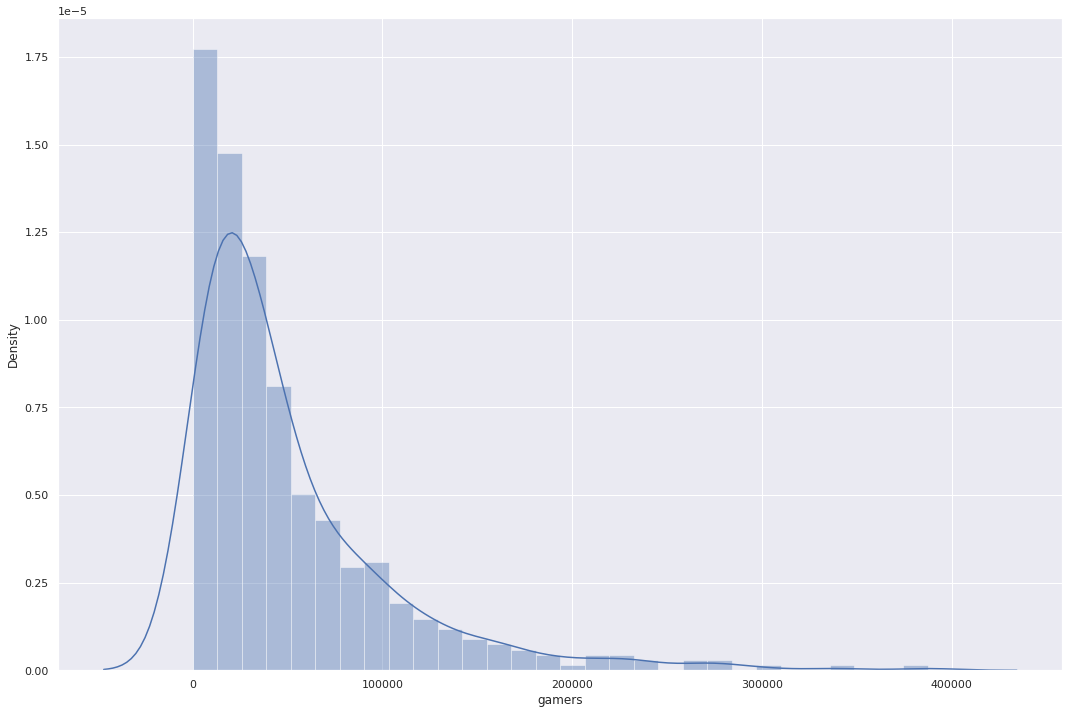

In [190]:
# distribuição de frequência para variável:

ax = sns.distplot(gamers_removed)


In [191]:
# média, mediana e moda:

pd.DataFrame({'Moda': gamers_removed.mode(), 'Média': gamers_removed.mean(), 'Mediana': gamers_removed.median()})

,Moda,Média,Mediana
0,44670.0,50225.935115,32854.5


In [192]:
# desvio médio, variância e desvio padrão:

pd.DataFrame({'Desvio médio': gamers_removed.mad(),
              'Variância': gamers_removed.var(),
              'Desvio padrão': gamers_removed.std()},
             index= [0])

,Desvio médio,Variância,Desvio padrão
0,38420.611547,2.984019e+09,54626.174418


In [193]:
# plotando gráfico boxplot:

fig = px.box(gamers_removed, orientation= 'h', title= 'Boxplot da variável gamers em jogos removidos do Xbox Game Pass')
fig.update_layout(title= {'x': 0.5})

### Metascore

Para todos os jogos inseridos no serviço

In [194]:
# estatísticas descritivas da coluna metascore:

metascore = gamepass['metascore']
metascore.describe()

count    745.000000
mean      76.774497
std        8.634305
min       35.000000
25%       72.000000
50%       78.000000
75%       82.000000
max       96.000000
Name: metascore, dtype: float64

In [195]:
# frequência das notas:

metascore.value_counts()

81.0    43
82.0    41
79.0    41
78.0    40
77.0    40
80.0    40
84.0    34
75.0    34
74.0    32
76.0    32
72.0    27
73.0    27
83.0    25
85.0    23
88.0    22
69.0    20
86.0    18
70.0    17
64.0    17
66.0    16
71.0    16
68.0    15
65.0    14
89.0    13
87.0    10
60.0     8
67.0     8
90.0     7
92.0     7
53.0     6
91.0     6
93.0     6
94.0     5
63.0     5
59.0     5
62.0     4
58.0     3
61.0     3
56.0     3
95.0     2
35.0     2
49.0     2
42.0     1
50.0     1
55.0     1
54.0     1
96.0     1
51.0     1
Name: metascore, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Distribuição de frequência da variável notas nos jogos inseridos no Xbox Game Pass')

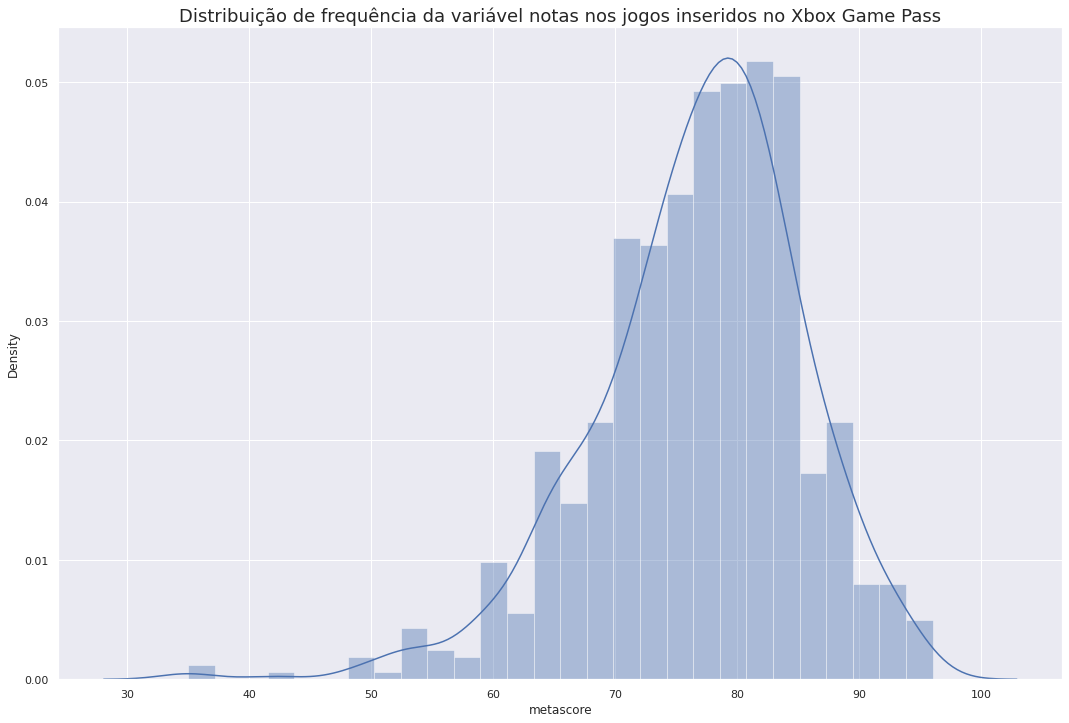

In [196]:
# distribuição das frequência das notas:

ax = sns.distplot(metascore)
ax.set_title('Distribuição de frequência da variável notas nos jogos inseridos no Xbox Game Pass', fontsize= 18)

In [197]:
# média, mediana e moda:

pd.DataFrame({'Moda': metascore.mode(), 'Média': metascore.mean().round(2), 'Mediana': metascore.median()})

,Moda,Média,Mediana
0,81.0,76.77,78.0


In [198]:
# desvio médio, variância e desvio padrão:

pd.DataFrame({'Desvio médio': metascore.mad(), 
              'Variância': metascore.var(), 
              'Desvio padrão': metascore.std()},
              index= [0])

,Desvio médio,Variância,Desvio padrão
0,6.611043,74.55123,8.634305


In [199]:
# porcentagem de jogos nas categorias vermelha, amarela e verde do metacritic:

bins = [0, 50.0, 75.0, 100.0]
labels = ['Vermelha', 'Amarela', 'Verde']

colors_metascore = round(pd.cut(metascore, bins= bins, labels= labels, right= False).value_counts(normalize= True) * 100, 2)
colors_metascore

Verde       65.77
Amarela     33.56
Vermelha     0.67
Name: metascore, dtype: float64

In [200]:
# gráfico boxplot das notas:

fig = px.box(metascore, orientation= 'h', title= 'Boxplot da variável metascore dos jogos inseridos no Xbox Game Pass')
fig.update_layout(title= {'x': 0.5})

Para os jogos ativos no serviço

In [201]:
# estatísticas descritivas:

metascore_active = gamepass.query('status == "Active"')['metascore']

metascore_active.describe()

count    301.000000
mean      77.205980
std        9.329028
min       35.000000
25%       72.000000
50%       78.000000
75%       84.000000
max       95.000000
Name: metascore, dtype: float64

In [202]:
# frequência das notas:

metascore_active.value_counts()

81.0    21
79.0    20
77.0    16
78.0    14
88.0    14
80.0    12
84.0    12
73.0    12
76.0    11
82.0    11
74.0    11
72.0    10
85.0    10
89.0    10
75.0     9
83.0     9
65.0     8
66.0     8
64.0     8
71.0     7
69.0     6
86.0     6
68.0     6
87.0     6
70.0     6
91.0     5
67.0     4
60.0     4
92.0     4
94.0     3
53.0     3
90.0     3
35.0     2
59.0     2
93.0     2
50.0     1
58.0     1
49.0     1
56.0     1
63.0     1
95.0     1
Name: metascore, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Distribuição de frequências da variável metascore em jogos ativos no Xbox Game Pass')

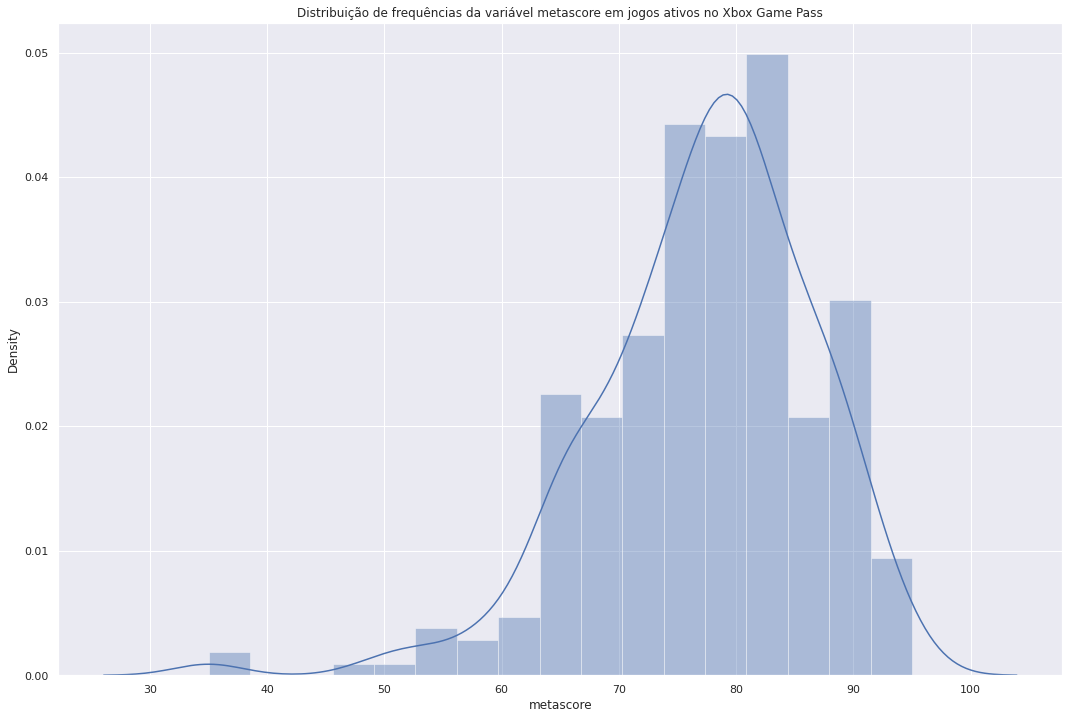

In [203]:
# distribuição das frequências do metascore para os jogos ativos:

ax = sns.distplot(metascore_active)
ax.set_title('Distribuição de frequências da variável metascore em jogos ativos no Xbox Game Pass')

In [204]:
# média, mediana e moda:

pd.DataFrame({'Moda': metascore_active.mode(), 'Média': metascore_active.mean(), 'Mediana': metascore_active.median()})

,Moda,Média,Mediana
0,81.0,77.20598,78.0


In [205]:
# desvio médio, variância e desvio padrão:

pd.DataFrame({'Desvio médio': metascore_active.mad(),
              'Variância': metascore_active.var(),
              'Desvio padrão': metascore_active.std()},
             index= [0])

,Desvio médio,Variância,Desvio padrão
0,7.119105,87.030764,9.329028


In [206]:
# porcentagem de jogos nas categorias vermelha, amarela e verde do metacritic:

pd.cut(metascore_active, bins= bins, labels= labels, right= False).value_counts(normalize= True) * 100

Verde       66.112957
Amarela     32.890365
Vermelha     0.996678
Name: metascore, dtype: float64

In [207]:
# plotando gráfico boxplot:

fig = px.box(metascore_active, orientation= 'h', title= 'Boxplot da variável metascore para jogos ativos no Xbox Game Pass')
fig.update_layout(title= {'x': 0.5})

Para os jogos removidos do serviço

In [208]:
# estatísticas descritivas:

metascore_removed = gamepass.query('status == "Removed"')['metascore']
metascore_removed.describe()

count    443.000000
mean      76.462754
std        8.126563
min       42.000000
25%       72.000000
50%       77.000000
75%       82.000000
max       96.000000
Name: metascore, dtype: float64

In [209]:
# frequência das notas no metascore:

metascore_removed.value_counts()

82.0    30
80.0    28
78.0    26
75.0    25
77.0    24
81.0    22
84.0    22
76.0    21
74.0    21
79.0    21
72.0    17
83.0    16
73.0    15
69.0    14
85.0    12
86.0    12
70.0    11
64.0     9
68.0     9
71.0     9
88.0     8
66.0     8
65.0     6
87.0     4
63.0     4
93.0     4
60.0     4
62.0     4
67.0     4
90.0     4
59.0     3
61.0     3
53.0     3
92.0     3
89.0     3
56.0     2
94.0     2
58.0     2
91.0     1
42.0     1
95.0     1
55.0     1
49.0     1
54.0     1
96.0     1
51.0     1
Name: metascore, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Distribuição de frequências da variável metascore para os jogos removidos do Xbox Game Pass')

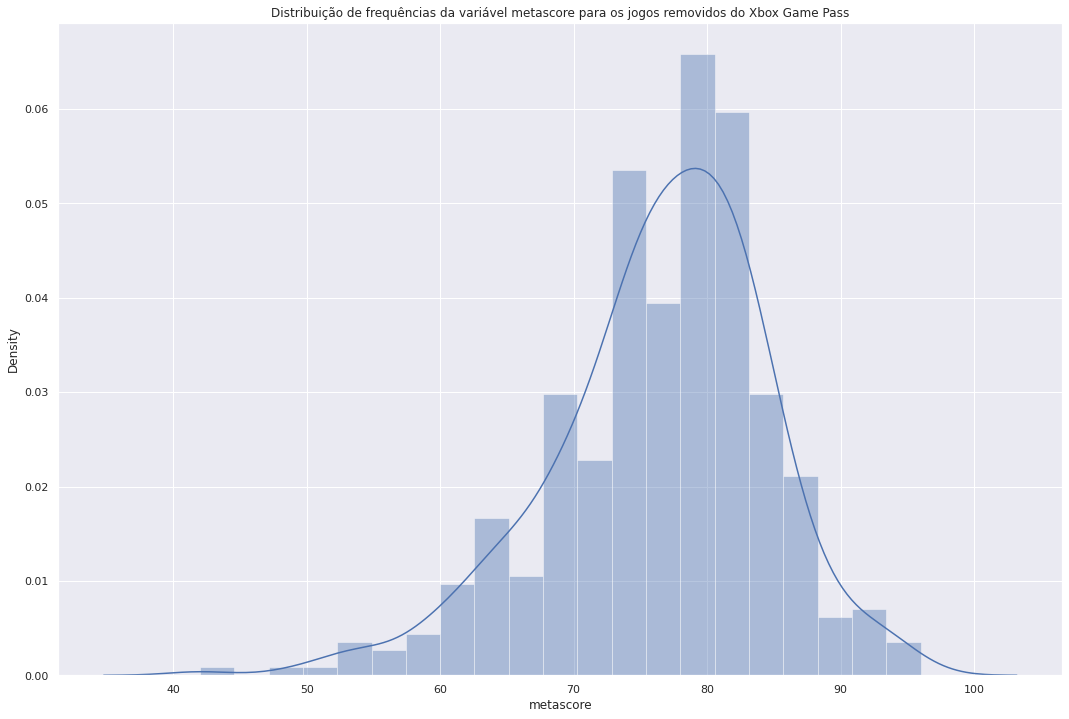

In [210]:
# distribuição de frequências:

ax = sns.distplot(metascore_removed)
ax.set_title('Distribuição de frequências da variável metascore para os jogos removidos do Xbox Game Pass')

In [211]:
# média, mediana e moda:

pd.DataFrame({'Moda': metascore_removed.mode(), 'Média': metascore_removed.mean(), 'Mediana': metascore_removed.median()})

,Moda,Média,Mediana
0,82.0,76.462754,77.0


In [212]:
# desvio médio, variância e desvio padrão:

pd.DataFrame({'Desvio médio': metascore_removed.mad(),
              'Variância': metascore_removed.var(),
              'Desvio padrão': metascore_removed.std()},
             index= [0])

,Desvio médio,Variância,Desvio padrão
0,6.253219,66.04103,8.126563


In [213]:
# porcentagem de jogos nas categorias vermelha, amarela e verde do metacritic:

pd.cut(metascore_removed, bins= bins, labels= labels, right= False).value_counts(normalize= True) * 100

Verde       65.462754
Amarela     34.085779
Vermelha     0.451467
Name: metascore, dtype: float64

In [214]:
# gráfico boxplot para as notas dos jogos removidos do Xbox Game Pass:

fig = px.box(metascore_removed, orientation= 'h', title= 'Boxplot da variável metascore para jogos removidos do Xbox Game Pass')
fig.update_layout(title= {'x': 0.5})

## Tempo para completar os jogos

Para os jogos inseridos no serviço

In [215]:
# estatísticas descritivas:

comp_time = gamepass['comp_time']
comp_time.describe()

count     846.000000
mean       44.907210
std        83.140189
min         0.250000
25%         9.000000
50%        22.500000
75%        45.000000
max      1000.000000
Name: comp_time, dtype: float64

In [216]:
freq_comp_time = comp_time.value_counts(normalize= True) * 100
pd.DataFrame({'Porcentagem (%)': freq_comp_time.values.round(2)},
             index= freq_comp_time.keys())

,Porcentagem (%)
17.50,12.41
45.00,10.64
22.50,10.05
9.00,8.27
70.00,8.27
27.50,6.50
7.00,6.38
90.00,4.73
13.50,4.26
1.50,3.55


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Distribuição de frequências para variável comp_time dos jogos inseridos no Xbox Game Pass')

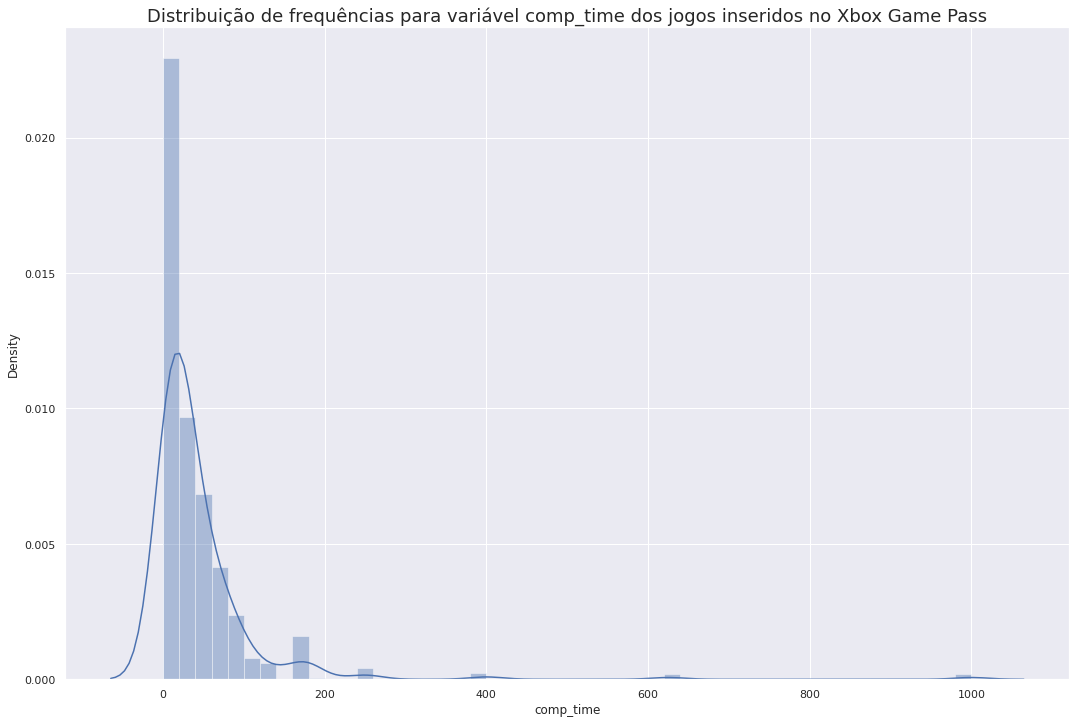

In [217]:
# distribuição das frequências:

ax = sns.distplot(comp_time)
ax.set_title('Distribuição de frequências para variável comp_time dos jogos inseridos no Xbox Game Pass', fontsize= 18)

In [218]:
# média, mediana e moda:

pd.DataFrame({'Moda': comp_time.mode(), 'Média': comp_time.mean(), 'Mediana': comp_time.median()})

,Moda,Média,Mediana
0,17.5,44.90721,22.5


In [219]:
# desvio médio, variância e desvio padrão:

pd.DataFrame({'Desvio médio': comp_time.mad(),
              'Variância': comp_time.var(),
              'Desvio padrão': comp_time.std()},
             index= [0])

,Desvio médio,Variância,Desvio padrão
0,39.497116,6912.291084,83.140189


In [220]:
# caterigozando os jogos inseridos pelo intervalo de tempo que levam para serem completados:

labels = ['0 e 5h', '5 e 10h', '10 e 20h', '20 e 50h',
          '50 e 100h', '100 e 150h', '150 e 200h', 
          '200 e 250h', '250 e 500h', '500 e 1000h']

groups_comp_time= pd.cut(comp_time, bins= [0, 5, 10, 20, 50, 100, 150, 200, 250, 500, 1000],
                        labels= labels, include_lowest= True, right= True).value_counts(normalize= True) * 100

pd.DataFrame({'Porcentagem (%)': groups_comp_time.values.round(2)},
              index= groups_comp_time.keys())

,Porcentagem (%)
20 e 50h,30.02
10 e 20h,19.15
50 e 100h,16.08
5 e 10h,15.37
0 e 5h,11.35
150 e 200h,3.31
100 e 150h,2.72
200 e 250h,0.83
500 e 1000h,0.71
250 e 500h,0.47


In [221]:
# decentis:

decentis = comp_time.quantile([d/10 for d in range(1, 10)])
decentis.index = decentis.index * 100
decentis

10.0     4.5
20.0     9.0
30.0    13.5
40.0    17.5
50.0    22.5
60.0    27.5
70.0    45.0
80.0    70.0
90.0    90.0
Name: comp_time, dtype: float64

In [222]:
# quartis:

comp_time.describe()[['25%', '50%', '75%']]

25%     9.0
50%    22.5
75%    45.0
Name: comp_time, dtype: float64

In [223]:
# plotando boxplot para variável comp_time dos jogos inseridos no serviço:

fig = px.box(comp_time, title= 'Boxplot da variável comp_time para os jogos inseridos no Xbox Game Pass',
             orientation= 'h')
fig.update_layout(title= {'x': 0.5})

Para os jogos ativos no serviço

In [224]:
# estatísticas descritivas:

comp_time_active = gamepass.query('status == "Active"')['comp_time']
comp_time_active.describe()

count     356.000000
mean       55.285112
std       108.038607
min         0.250000
25%        10.500000
50%        27.500000
75%        70.000000
max      1000.000000
Name: comp_time, dtype: float64

In [225]:
# frequência dos dados da variável:

freq_comp_time_active = comp_time_active.value_counts(normalize= True) * 100
pd.DataFrame({'Porcentagem (%)': freq_comp_time_active.values.round(2)},
              index= freq_comp_time_active.keys())


,Porcentagem (%)
45.00,10.39
22.50,9.83
70.00,8.99
17.50,8.43
9.00,8.15
27.50,7.87
90.00,6.74
55.00,4.49
1.50,4.49
175.00,4.21


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Distribuição de frequências na variável comp_time para jogos ativos no Xbox Game Pass')

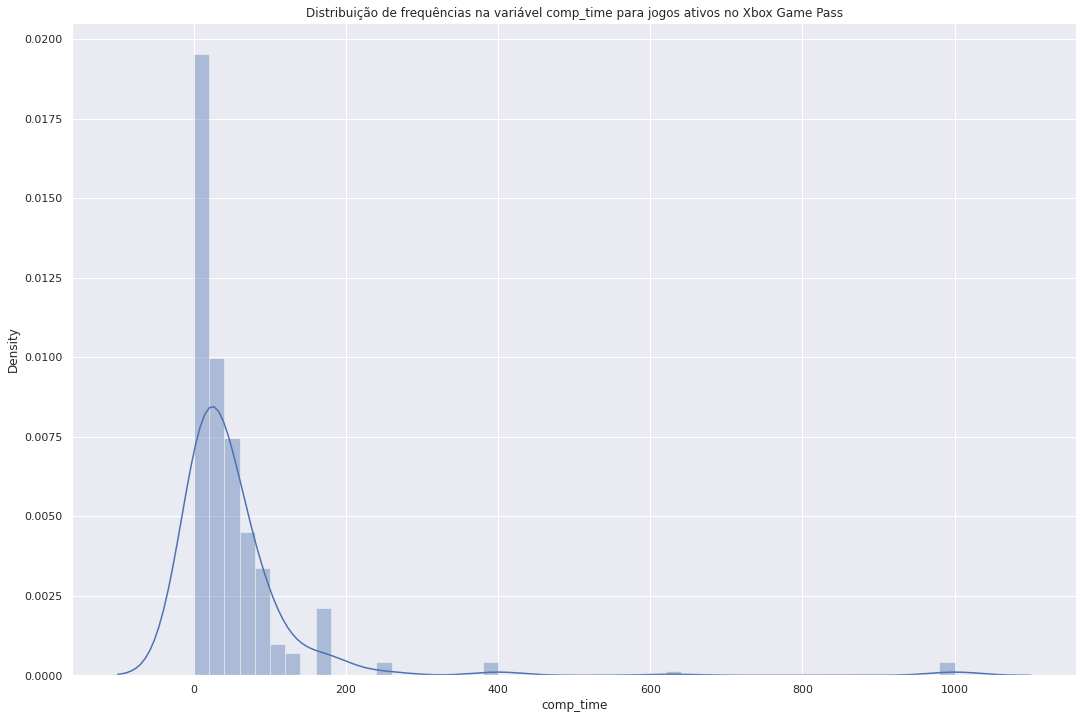

In [226]:
# distribuição de frequências:

ax = sns.distplot(comp_time_active)
ax.set_title('Distribuição de frequências na variável comp_time para jogos ativos no Xbox Game Pass')

In [227]:
# média, mediana e moda:

pd.DataFrame({'Moda': comp_time_active.mode(),
              'Média': comp_time_active.mean(),
              'Mediana': comp_time_active.median()})

,Moda,Média,Mediana
0,45.0,55.285112,27.5


In [228]:
# desvio médio, variância e desvio padrão:

pd.DataFrame({'Desvio médio': comp_time_active.mad(),
              'Variância': comp_time_active.var(),
              'Mediana': comp_time_active.std()},
             index= [0])

,Desvio médio,Variância,Mediana
0,50.019576,11672.340665,108.038607


In [229]:
# caterigozando os jogos ativos pelo intervalo de tempo que levam para serem completados:

labels = ['0 e 5h', '5 e 10h', '10 e 20h', '20 e 50h',
          '50 e 100h', '100 e 150h', '150 e 200h', 
          '200 e 250h', '250 e 500h', '500 e 1000h']

groups_active_comp_time= pd.cut(comp_time_active, bins= [0, 5, 10, 20, 50, 100, 150, 200, 250, 500, 1000],
                        labels= labels, include_lowest= True, right= True).value_counts(normalize= True) * 100

pd.DataFrame({'Porcentagem (%)': groups_active_comp_time.values.round(2)},
              index= groups_active_comp_time.keys())

,Porcentagem (%)
20 e 50h,30.34
50 e 100h,20.22
10 e 20h,14.04
5 e 10h,12.64
0 e 5h,12.36
150 e 200h,4.21
100 e 150h,3.37
500 e 1000h,1.12
200 e 250h,0.84
250 e 500h,0.84


In [230]:
# decentis:

decentis = pd.DataFrame(comp_time_active.quantile([d/10 for d in range(1, 10)]))
decentis

,comp_time
0.1,3.5
0.2,9.0
0.3,13.5
0.4,22.5
0.5,27.5
0.6,45.0
0.7,55.0
0.8,70.0
0.9,110.0


In [231]:
# quartis:

comp_time_active.describe()[['25%', '50%', '75%']]

25%    10.5
50%    27.5
75%    70.0
Name: comp_time, dtype: float64

In [232]:
# plotando gráfico boxplot:

fig = px.box(comp_time_active, title= 'Box da variável comp_time para jogos ativos no Xbox Game Pass', orientation= 'h')
fig.update_layout(title= {'x': 0.5})

Para os jogos removidos do serviço

In [233]:
# estatísticas descritivas:

comp_time_removed = gamepass.query('status == "Removed"')['comp_time']
comp_time_removed.describe()

count    490.000000
mean      37.367347
std       57.752863
min        0.250000
25%        9.000000
50%       17.500000
75%       45.000000
max      625.000000
Name: comp_time, dtype: float64

In [234]:
# frequências dos dados:

freq_comp_time_removed = comp_time_removed.value_counts(normalize= True) * 100
pd.DataFrame({'Porcentagem (%)': freq_comp_time_removed.values.round(2)},
             index= freq_comp_time_removed.keys())

,Porcentagem (%)
17.50,15.31
45.00,10.82
22.50,10.20
9.00,8.37
7.00,7.96
70.00,7.76
27.50,5.51
13.50,4.69
2.50,3.27
90.00,3.27


In [235]:
# média, mediana e moda:

pd.DataFrame({'Moda': comp_time_removed.mode(), 
              'Média': comp_time_removed.mean(), 
              'Mediana': comp_time_removed.median()})

,Moda,Média,Mediana
0,17.5,37.367347,17.5


In [236]:
# desvio médio, variância e desvio padrão:

pd.DataFrame({'Desvio médio': comp_time_removed.mad(),
              'Variância': comp_time_removed.var(),
              'Desvio padrão': comp_time_removed.std()},
             index= [0])

,Desvio médio,Variância,Desvio padrão
0,31.797668,3335.393155,57.752863


In [237]:
# caterigozando os jogos ativos pelo intervalo de tempo que levam para serem completados:

labels = ['0 e 5h', '5 e 10h', '10 e 20h', '20 e 50h',
          '50 e 100h', '100 e 150h', '150 e 200h', 
          '200 e 250h', '250 e 500h', '500 e 1000h']

groups_removed_comp_time= pd.cut(comp_time_removed, bins= [0, 5, 10, 20, 50, 100, 150, 200, 250, 500, 1000],
                        labels= labels, include_lowest= True, right= True).value_counts(normalize= True) * 100

pd.DataFrame({'Porcentagem (%)': groups_removed_comp_time.values.round(2)},
              index= groups_removed_comp_time.keys())

,Porcentagem (%)
20 e 50h,29.80
10 e 20h,22.86
5 e 10h,17.35
50 e 100h,13.06
0 e 5h,10.61
150 e 200h,2.65
100 e 150h,2.24
200 e 250h,0.82
500 e 1000h,0.41
250 e 500h,0.20


In [238]:
# decentis:

pd.DataFrame(comp_time_removed.quantile([d/10 for d in range(1, 10)]))

,comp_time
0.1,4.5
0.2,9.0
0.3,11.0
0.4,17.5
0.5,17.5
0.6,22.5
0.7,45.0
0.8,45.0
0.9,70.0


In [239]:
# quartis:

comp_time_removed.describe()[['25%', '50%', '75%']]

25%     9.0
50%    17.5
75%    45.0
Name: comp_time, dtype: float64

In [240]:
# plotando gráfico boxplot para os jogos removidos do serviço:

fig = px.box(comp_time_removed, orientation= 'h')
fig

## Taxa de completação

Para os jogos inseridos no serviço

In [241]:
# estatísticas descritivas da variável:

comp = gamepass['comp_%']
comp.describe()

count    926.000000
mean       7.093629
std       12.434948
min        0.000000
25%        0.600000
50%        2.200000
75%        7.375000
max       84.200000
Name: comp_%, dtype: float64

In [242]:
# frequência em porcentagem:

pd.DataFrame({'Porcentagem (%)':comp.value_counts(normalize= True) * 100})

,Porcentagem (%)
0.0,5.939525
0.1,4.103672
0.3,4.103672
0.2,3.347732
0.6,3.347732
...,...
35.2,0.107991
35.8,0.107991
41.5,0.107991
16.0,0.107991


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Box plot da variável comp_% para os jogos inseridos no Xbox Game Pass')

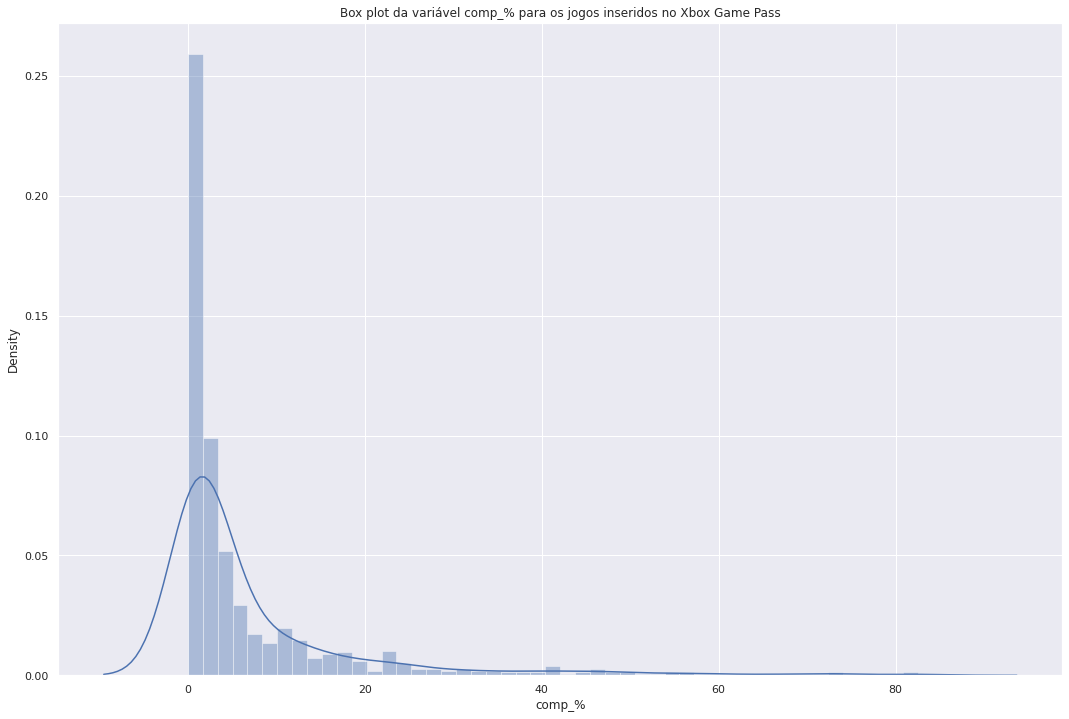

In [243]:
# distribuiçao de frequências para variável:

ax = sns.distplot(comp)
ax.set_title('Box plot da variável comp_% para os jogos inseridos no Xbox Game Pass')

In [244]:
# média, mediana e moda:

pd.DataFrame({'Moda': comp.mode(),
              'Média': comp.mean(),
              'Mediana': comp.median()})

,Moda,Média,Mediana
0,0.0,7.093629,2.2


In [245]:
# desvio médio, variância e desvio padrão:

pd.DataFrame({'Desvio médio': comp.mad(),
              'Variância': comp.var(),
              'Desvio padrão': comp.std()},
             index = [0])

,Desvio médio,Variância,Desvio padrão
0,7.84967,154.627927,12.434948


In [246]:
# taxa de completação por grupos:

bins = [0, 5, 10, 20, 40, 60, 80, 100]
labels = ['Entre 0 e 5%', 'Entre 5 e 10%', 'Entre 10 e 20%', 'Entre 20 e 40%', 'Entre 40 e 60%', 'Entre 60 e 80%', 'Entre 80 e 100%']

comp_cut = pd.cut(comp, bins= bins, labels= labels).value_counts(normalize= True) * 100
pd.DataFrame({'Frequência em (%)': comp_cut})

,Frequência em (%)
Entre 0 e 5%,67.049369
Entre 10 e 20%,11.595867
Entre 5 e 10%,10.677382
Entre 20 e 40%,6.429392
Entre 40 e 60%,2.985075
Entre 60 e 80%,0.918485
Entre 80 e 100%,0.344432


In [247]:
# decentis:

pd.DataFrame(comp.quantile([d/10 for d in range(1, 10)]))

,comp_%
0.1,0.15
0.2,0.40
0.3,0.80
0.4,1.50
0.5,2.20
0.6,3.30
0.7,5.40
0.8,10.60
0.9,20.05


In [248]:
# quartis:

pd.DataFrame(comp.describe()[['25%', '50%', '75%']])

,comp_%
25%,0.600
50%,2.200
75%,7.375


In [249]:
# boxplot da variável comp_% para os jogos inseridos no serviço:

fig = px.box(comp, orientation= 'h', title= 'Boxplot da variável comp_% para os jogos inseridos no Xbox Game Pass')
fig.update_layout(title= {'x': 0.5})

Para os jogos ativos no serviço

In [250]:
# estatísticas descritivas para variável dos jogos ativos no serviço: 

comp_active = gamepass.query('status == "Active"')['comp_%']
comp_active.describe()

count    392.000000
mean       6.776020
std       12.334525
min        0.000000
25%        0.500000
50%        2.000000
75%        6.025000
max       81.600000
Name: comp_%, dtype: float64

In [251]:
# frequência em porcentagem:

pd.DataFrame({'Frequência em (%)': comp_active.value_counts(normalize= True) * 100})

,Frequência em (%)
0.0,7.908163
0.1,4.846939
0.3,4.081633
0.2,3.826531
0.4,3.061224
...,...
27.9,0.255102
41.9,0.255102
41.5,0.255102
35.2,0.255102


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Distribuição de frequência da variável comp_% para os jogos ativos no Xbox Game Pass')

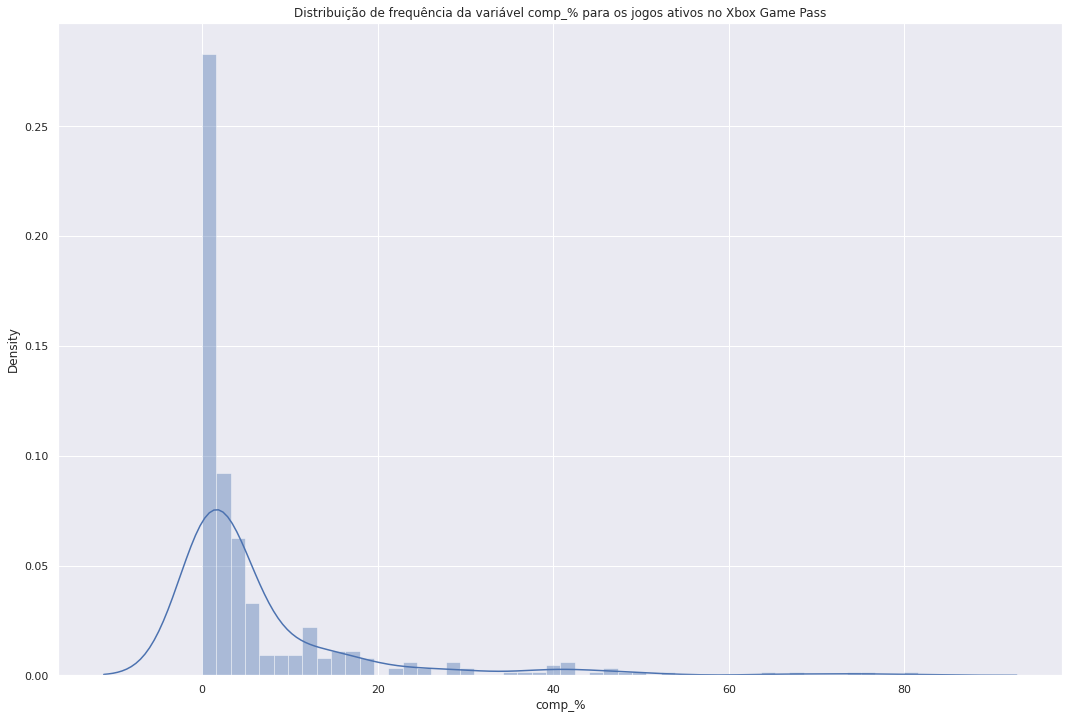

In [252]:
# gráfico para distribuição de frequência:

ax = sns.distplot(comp_active)
ax.set_title('Distribuição de frequência da variável comp_% para os jogos ativos no Xbox Game Pass')

In [253]:
# média, mediana e moda:

pd.DataFrame({'Moda': comp_active.mode(),
              'Média': comp_active.mean(),
              'Mediana': comp_active.median()})

,Moda,Média,Mediana
0,0.0,6.77602,2.0


In [254]:
# desvio médio, variância e desvio padrão:

pd.DataFrame({'Desvio médio': comp_active.mad(),
              'Variância': comp_active.var(),
              'Desvio padrão': comp_active.std()},
             index= [0])

,Desvio médio,Variância,Desvio padrão
0,7.753868,152.140498,12.334525


In [255]:
# taxa de completação por grupos:

comp_active_cut = pd.cut(comp_active, bins= bins, labels= labels).value_counts(normalize= True) * 100
pd.DataFrame({'Frequência em (%)': comp_active_cut})

,Frequência em (%)
Entre 0 e 5%,69.529086
Entre 10 e 20%,12.188366
Entre 5 e 10%,8.587258
Entre 20 e 40%,4.986150
Entre 40 e 60%,3.324100
Entre 60 e 80%,1.108033
Entre 80 e 100%,0.277008


In [256]:
# decentis:

pd.DataFrame(comp_active.quantile([d/10 for d in range(1, 10)]))

,comp_%
0.1,0.10
0.2,0.30
0.3,0.70
0.4,1.24
0.5,2.00
0.6,3.00
0.7,4.67
0.8,10.18
0.9,17.97


In [257]:
# quartis:

pd.DataFrame(comp_active.describe()[['25%', '50%', '75%']])

,comp_%
25%,0.500
50%,2.000
75%,6.025


In [258]:
# boxplot para os jogos ativos no serviço:

fig = px.box(comp_active, orientation= 'h', title= 'Boxplot da variável comp_% para os jogos ativos no Xbox Game Pass')
fig.update_layout(title= {'x': 0.5})


Para os jogos removidos do serviço

In [259]:
# estatísticas descritivas:

comp_removed = gamepass.query('status == "Removed"')['comp_%']
comp_removed.describe()

count    524.000000
mean       7.466412
std       12.592279
min        0.000000
25%        0.700000
50%        2.450000
75%        8.325000
max       84.200000
Name: comp_%, dtype: float64

In [260]:
# frequências em porcentagem:

pd.DataFrame(comp_removed.value_counts(normalize= True) * 100)

,comp_%
0.3,4.198473
0.6,3.625954
0.1,3.435115
0.7,3.053435
0.2,3.053435
...,...
7.3,0.190840
9.4,0.190840
54.7,0.190840
5.3,0.190840


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Distribuição de frequências da variável comp_% dos jogos removidos do Xbox Game Pass')

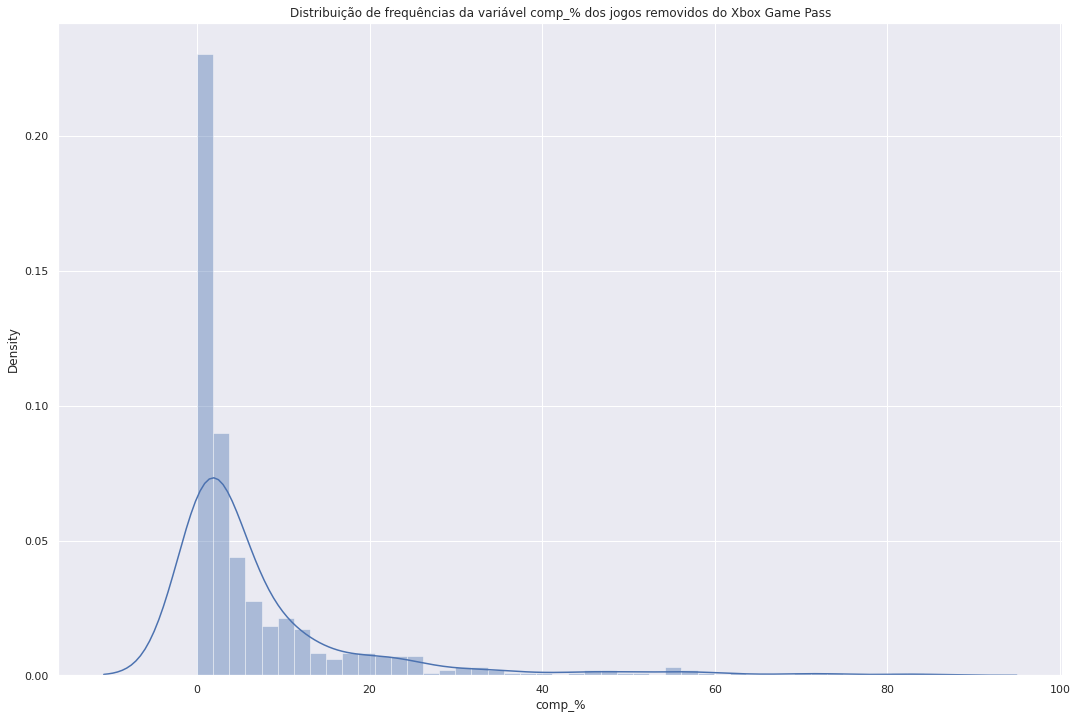

In [261]:
# gráfico com a distribuição de frequências:

ax = sns.distplot(comp_removed)
ax.set_title('Distribuição de frequências da variável comp_% dos jogos removidos do Xbox Game Pass')

In [262]:
# média, mediana e moda:

pd.DataFrame({'Moda': comp_removed.mode(),
              'Média': comp_removed.mean(),
              'Mediana': comp_removed.median()})

,Moda,Média,Mediana
0,0.3,7.466412,2.45


In [263]:
# desvio médio, variância e desvio padrão:

pd.DataFrame({'Desvio médio': comp_removed.mad(),
              'Variância': comp_removed.var(),
              'Desvio padrão': comp_removed.std()},
             index= [0])

,Desvio médio,Variância,Desvio padrão
0,7.97749,158.565485,12.592279


In [264]:
# dividindo os dados de jogos removidos em grupos:

comp_removed_cut = pd.cut(comp_removed, bins= bins, labels= labels).value_counts(normalize= True) * 100
pd.DataFrame({'Frequência em (%)': comp_removed_cut})

,Frequência em (%)
Entre 0 e 5%,65.225933
Entre 5 e 10%,12.180747
Entre 10 e 20%,11.198428
Entre 20 e 40%,7.465619
Entre 40 e 60%,2.750491
Entre 60 e 80%,0.785855
Entre 80 e 100%,0.392927


In [265]:
# decentis:

pd.DataFrame(comp_removed.quantile([d/10 for d in range(1, 10)]))

,comp_%
0.1,0.30
0.2,0.60
0.3,0.99
0.4,1.60
0.5,2.45
0.6,3.78
0.7,6.40
0.8,11.04
0.9,20.80


In [266]:
# quartis:

comp_removed.describe()[['25%', '50%', '75%']]

25%    0.700
50%    2.450
75%    8.325
Name: comp_%, dtype: float64

In [267]:
# boxplot da variável para os jogos removidos:

fig = px.box(comp_removed, orientation= 'h', title= 'Boxplot da variável para os jogos removidos do Xbox Game Pass')
fig.update_layout(title= {'x': 0.5})